# simple linear regression
# load the data

In [103]:
import pandas as pd

In [105]:
df=pd.read_csv("C:\\Users\\sivas\\OneDrive\\Desktop\\Coursera\\IBM\\Machine learning\\FuelConsumptionCo2.csv")

# EXPLORATION

In [108]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [110]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [112]:
cdf=df[['ENGINESIZE',	'CYLINDERS',	'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

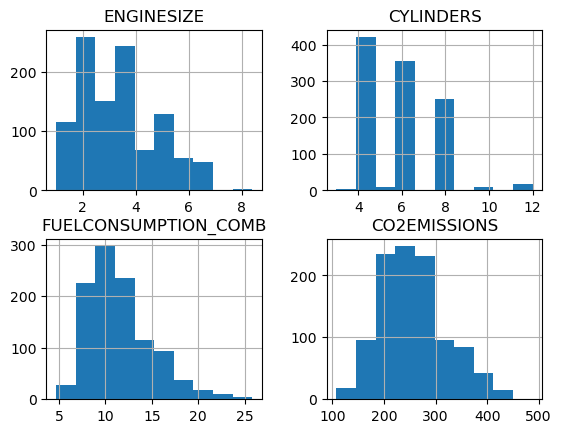

In [114]:
cdf.hist()

Text(0.5, 0, 'CYLINDERS')

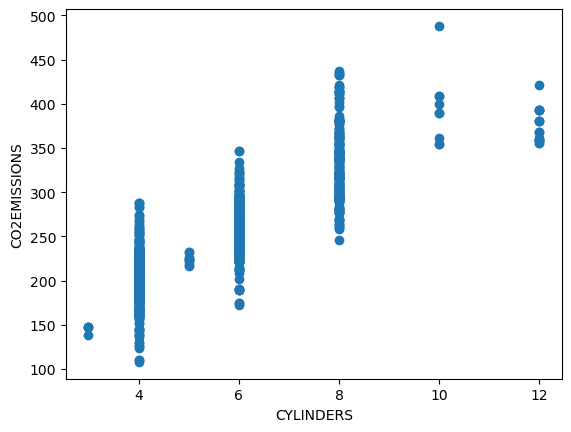

In [115]:
import matplotlib.pyplot as plt
plt.scatter(cdf['CYLINDERS'],cdf['CO2EMISSIONS'])
plt.ylabel('CO2EMISSIONS')
plt.xlabel('CYLINDERS')

Text(0.5, 0, 'ENGINESIZE')

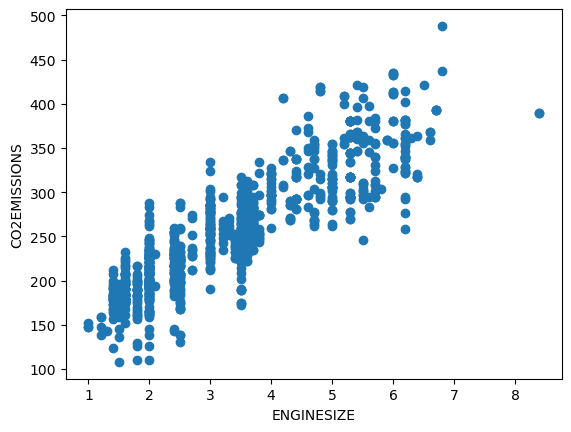

In [118]:
import matplotlib.pyplot as plt
plt.scatter(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'])
plt.ylabel('CO2EMISSIONS')
plt.xlabel('ENGINESIZE')

Text(0.5, 0, 'FUELCONSUMPTION_COMB')

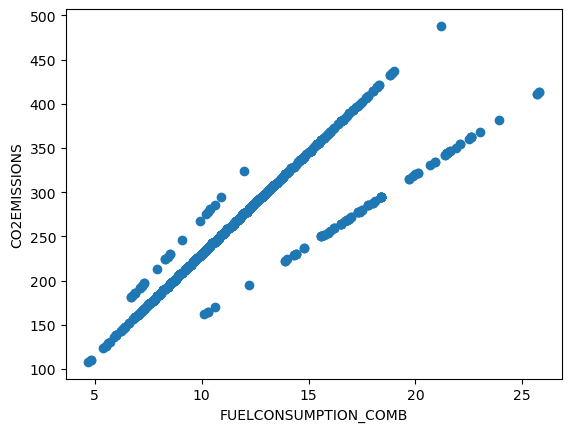

In [120]:
import matplotlib.pyplot as plt
plt.scatter(cdf['FUELCONSUMPTION_COMB'],cdf['CO2EMISSIONS'])
plt.ylabel('CO2EMISSIONS')
plt.xlabel('FUELCONSUMPTION_COMB')

# train test split

In [123]:
import numpy as np
tt=np.random.rand(len(df))<0.8

In [125]:
train=cdf[tt]
test=cdf[~tt]

train-data distribution

Text(0.5, 0, 'ENGINESIZE')

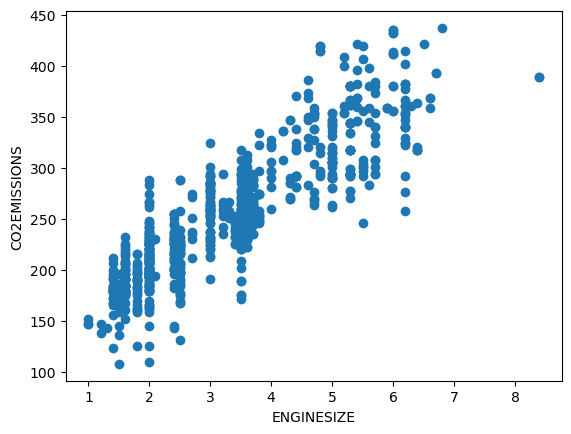

In [128]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
plt.ylabel('CO2EMISSIONS')
plt.xlabel('ENGINESIZE')

# simple linear regression

In [268]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
trainx=np.asanyarray(train[['ENGINESIZE']])
trainy=np.asanyarray(train[['CO2EMISSIONS']])
model.fit(trainx,trainy)

LinearRegression()

In [270]:
model.intercept_

array([126.61016312])

In [272]:
model.coef_

array([[38.75028504]])

In [274]:
testx=np.asanyarray(test[['ENGINESIZE']])
testy=np.asanyarray(test[['CO2EMISSIONS']])
yhat=model.predict(testx)

In [276]:
yhat1=model.predict(trainx)

# plot output

Text(0.5, 0, 'ENGINESIZE')

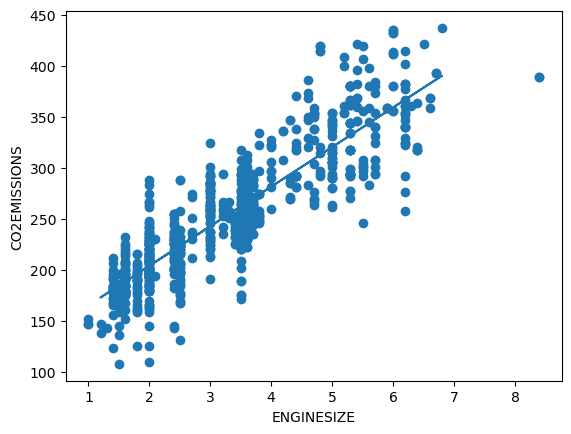

In [279]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
plt.plot(testx,model.intercept_[0]+model.coef_[0][0]*testx)
plt.ylabel('CO2EMISSIONS')
plt.xlabel('ENGINESIZE')

Text(0.5, 0, 'ENGINESIZE')

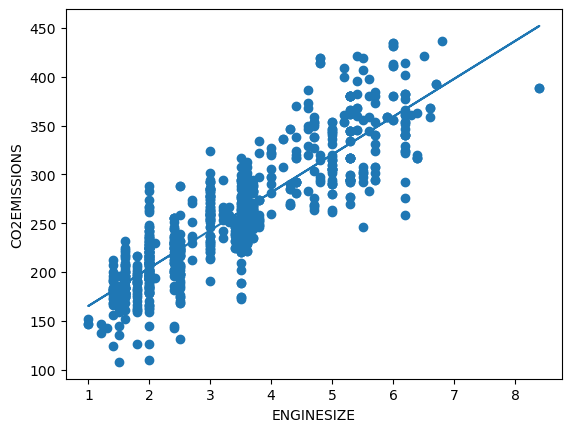

In [280]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'])
plt.plot(trainx,model.intercept_[0]+model.coef_[0][0]*trainx)
plt.ylabel('CO2EMISSIONS')
plt.xlabel('ENGINESIZE')

In [281]:
import seaborn as sns

C:\Users\sivas\AppData\Local\Temp\ipykernel_1940\1348988786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat)
C:\Users\sivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sivas\AppData\Local\Temp\ipykernel_1940\1348988786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

<Axes: ylabel='Density'>

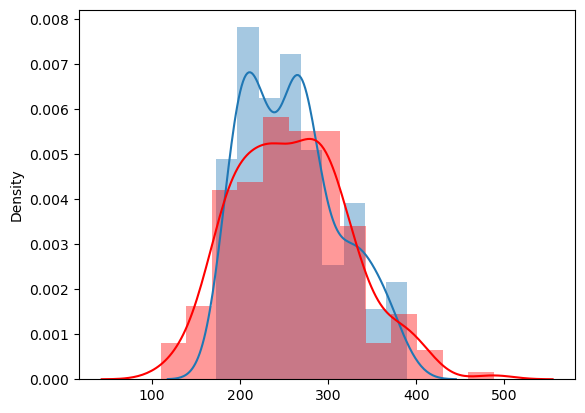

In [282]:
sns.distplot(yhat)
sns.distplot(testy,color='r')

C:\Users\sivas\AppData\Local\Temp\ipykernel_1940\1830628903.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat1)
C:\Users\sivas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sivas\AppData\Local\Temp\ipykernel_1940\1830628903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `his

<Axes: ylabel='Density'>

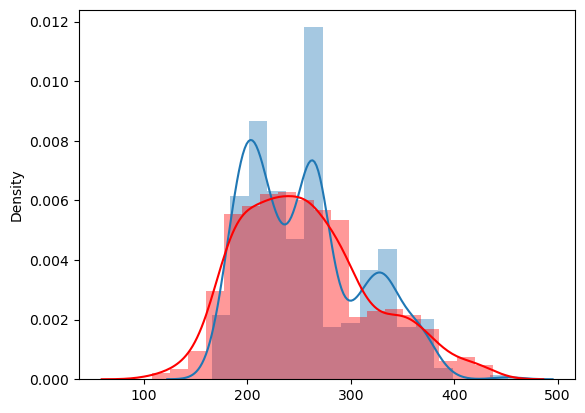

In [283]:
sns.distplot(yhat1)
sns.distplot(trainy,color='r')

# evaluation

In [285]:
from sklearn.metrics import r2_score

In [286]:
model.score(testx,testy) 

0.7460712033521

In [287]:
r2_score(testy,yhat) 

0.7460712033521

In [288]:
r2_score(trainy,yhat1) 

0.7686388365330588

In [289]:
print('mse' ,np.mean((testy-yhat)**2)) # rss

mse 1065.9979020368273


In [290]:
print('mae' ,np.mean(np.absolute((testy-yhat)))) #MAE

mae 24.5236037552881


2nd feature

In [292]:
from sklearn import linear_model

In [305]:
trainx = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
trainy = np.asanyarray(train[['CO2EMISSIONS']])

In [260]:
regr = linear_model.LinearRegression()
regr.fit(trainx, trainy)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

#ADD CODE


Coefficients:  [[15.98354331]]
Intercept:  [70.62261817]


In [262]:
testx = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
testy = np.asanyarray(test[['CO2EMISSIONS']])
predictions = regr.predict(testx) #ADD CODE

In [264]:
#ADD CODE
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions-testy)))
print(r2_score(testy,predictions))
print("R2-score: %.2f" % r2_score(testy , predictions) )    # all metrics first predicted,actual

Mean absolute error: 20.58
0.8158043670630639
R2-score: 0.82


In [266]:
# mae is worse in enginesize than the fuelconsumption_comb